In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, ensemble


In [78]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))


In [79]:
# https://www.kaggle.com/tunguz/deep-solar-dataset
df_all = pd.read_csv('deepsolar_tract.csv', encoding='latin-1')

In [80]:
for col in df_all.columns:
    try:
        pd.to_numeric(df_all[col])
    except:
        print(col)

county
state
electricity_price_transportation


In [81]:
df_all = df_all.dropna()

In [246]:
# df = df_all[df_all['total_panel_area_residential']>0]
df = df_all
# df = df[df.state != 'ca']
# df = df[df.state == 'ca']

In [247]:
df['median_income_per_area_residential'] = df['median_household_income'].div(df.land_area)
df['income_per_area_residential'] = df['average_household_income']*df['household_count'].div(df.land_area)
df['household_density'] = df['household_count'].div(df.land_area)
df['education_higher_ed_rate'] = (df['education_bachelor'] + df['education_doctoral'] + df['education_master'] + df['education_professional_school']).div(df.education_population)

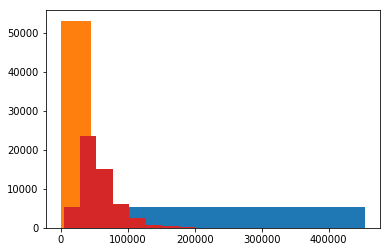

In [248]:
x = 10
n, bins_equl_n, patches = plt.hist(df.population_density, histedges_equalN(df.population_density, 10))
df['population_density_bin_equaln'] = pd.cut(df['population_density'],bins_equl_n, labels = [str(n) for n in range(len(bins_equl_n)-1)])

x = 10
n, bins_equl_width, patches = plt.hist(df.population_density, 10)
df['population_density_bin_equalwidth'] = pd.cut(df['population_density'],bins_equl_width)

n, bins, patches = plt.hist(df['mortgage_with_rate'],5)
df['mortgage_with_rate_bin'] = pd.cut(df['mortgage_with_rate'],bins, labels = [n for n in range(len(bins)-1)])

df['incentive_residential_state_level_bin'] = pd.cut(df['incentive_residential_state_level'],[0,5,8,15,18])
df['daily_solar_radiation_bin'] = pd.cut(df['daily_solar_radiation'],[0,4,5,7], labels = [n for n in range(len([0,4,5,7])-1)])

n, bins, patches = plt.hist(df['median_household_income'],10)
df['median_household_income_bin'] = pd.cut(df['median_household_income'],bins, labels = [n for n in range(len(bins)-1)])

df['age_retired']= df.population*df.age_65_74_rate + df.population*df.age_75_84_rate + df.population*df.age_more_than_85_rate 
df['age_retired_rate'] = df['age_retired'].div(df.population)

In [253]:
target = 'solar_system_count_residential'#'total_panel_area'

binned_var_omit = [col for col in df.columns if '_bin' in col and col !='daily_solar_radiation_bin']

omit = ['Unnamed: 0','fips','solar_system_count_nonresidential', 'total_panel_area', 'population_density_bin_equalwidth','population_density_bin_equaln','fips', 'county', 'state', 'electricity_price_transportation', 'total_panel_area_residential',
'total_panel_area_nonresidential',  'education_population','solar_panel_area_divided_by_area', 'solar_panel_area_per_capita',
        'tile_count','tile_count_residential', 'tile_count_nonresidential','number_of_solar_system_per_household', 'solar_system_count']

edu_omit = ['education_bachelor','education_college','education_doctoral','education_high_school_graduate','education_less_than_high_school','education_master','education_professional_school']
race_omit = ['race_asian','race_black_africa','race_indian_alaska','race_islander','race_other','race_two_more','race_white', 'race_indian_alaska_rate','race_two_more_rate']
heat_fuel_omit = ['heating_fuel_coal_coke','heating_fuel_electricity','heating_fuel_fuel_oil_kerosene','heating_fuel_gas','heating_fuel_housing_unit_count',
'heating_fuel_none','heating_fuel_other','heating_fuel_solar', 'heating_fuel_solar_rate']


edu_rate_omit = ['education_bachelor_rate','education_college_rate','education_doctoral_rate','education_high_school_graduate_rate','education_less_than_high_school_rate','education_master_rate','education_professional_school_rate']
race_rate_omit = ['race_asian_rate','race_black_africa_rate','race_indian_alaska_rate','race_islander_rate','race_other_rate','race_two_more_rate','race_white_rate','race_indian_alaska','race_two_more']
heat_fuel_rate_omit = ['heating_fuel_coal_coke_rate','heating_fuel_electricity_rate','heating_fuel_fuel_oil_kerosene_rate','heating_fuel_gas_rate','heating_fuel_housing_unit_count_rate',
'heating_fuel_none_rate','heating_fuel_other_rate','heating_fuel_solar_rate', 'heating_fuel_solar']

nonresidential = ['electricity_price_overall', 'electricity_consume_industrial', 'electricity_consume_total','electricity_price_industrial','electricity_price_commercial']

regardless_omit = ['water_area', 'lon', 'heating_design_temperature']#['heating_fuel_fuel_oil_kerosene_rate','heating_fuel_fuel_oil_kerosene','race_indian_alaska_rate','race_islander_rate', 'race_indian_alaska','race_islander']

In [254]:
df = df_all

In [258]:
X = df.loc[:, ~(df.columns).isin(omit+binned_var_omit+ regardless_omit+edu_omit+race_omit+heat_fuel_omit+ regardless_omit+ nonresidential)]#+binned_var_omit)]
# X = df.loc[:, ~(df.columns).isin([target]+ omit+edu_rate_omit+race_rate_omit+heat_fuel_rate_omit+regardless_omit+ nonresidential)]
# features = ['median_household_income', 'education_bachelor_rate','population','race_white_rate', 'electricity_price_residential', 
#            'electricity_consume_residential', 'household_count','housing_unit_median_value','occupancy_owner_rate',
#            'mortgage_with_rate', 'age_35_44_rate', 'age_median','incentive_residential_state_level', 'voting_2016_dem_win']


# X = df[features]
Y = df[target]

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


daily_solar_radiation_bin 0 lin_reg [ 0.37608424  0.35581991  0.3645039 ]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


daily_solar_radiation_bin 0 clf [ 0.66584717  0.65538397  0.63533909]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


daily_solar_radiation_bin 1 lin_reg [ 0.50544255  0.47017455  0.52687661]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


daily_solar_radiation_bin 1 clf [ 0.72347569  0.68052711  0.72131543]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set 

incentive_residential_state_level_bin 0 lin_reg [ 0.29799836  0.30723321  0.28355722]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 0 clf [ 0.46959752  0.57079385  0.50942001]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 1 lin_reg [ 0.46366866  0.56020621  0.48062858]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 1 clf [ 0.75516033  0.807131    0.73055744]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 2 lin_reg [ 0.37300572  0.39687571  0.35036457]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 2 clf [ 0.64261933  0.61556827  0.52614204]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 3 lin_reg [ 0.57547952  0.54886201  0.58962017]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


incentive_residential_state_level_bin 3 clf [ 0.74203812  0.70653631  0.73303592]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


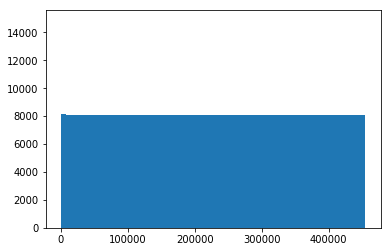

In [235]:
x = 5
n, bins_equl_n, patches = plt.hist(X_train.population_density, histedges_equalN(X_train.population_density, x))
# df['population_density_bin_equaln'] = pd.cut(df['population_density'],bins_equl_n, labels = [str(n) for n in range(len(bins_equl_n)-1)])
n, incentive_bins_equl_n, patches = plt.hist(X_train.incentive_residential_state_level, histedges_equalN(X_train.incentive_residential_state_level, 4))
incentive_bins_equl_n[0]=0
df['incentive_residential_state_level_bin'] = pd.cut(df['incentive_residential_state_level'],incentive_bins_equl_n, labels = [n for n in range(len(incentive_bins_equl_n)-1)])

# n, ssc_bins_equln, patches = plt.hist(X_train.solar_system_count_residential, 3)
# ssc_bins_equln[0] = -1
# df['solar_system_count_residential_bin'] = pd.cut(df['solar_system_count_residential'],ssc_bins_equln)



d= {'daily_solar_radiation_bin':{'feature':'daily_solar_radiation', 'splits':[0,4.5,9], 'labels':[n for n in range(len([0,4,7])-1)]},
'incentive_residential_state_level_bin':{'feature':'incentive_residential_state_level','splits':incentive_bins_equl_n, 'labels':[n for n in range(len(incentive_bins_equl_n)-1)]}}
   #'solar_system_count_residential_bin': {'feature':'solar_system_count_residential', 'splits':ssc_bins_equln, 'labels':[n for n in range(len(ssc_bins_equln))]}}
#    'population_density_bin_equaln': {'feature':'population_density', 'splits': bins_equl_n, 'labels': [str(n) for n in range(len(bins_equl_n)-1)]}
#    }

params = {'n_estimators': 400, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model_results = {}
models = {'lin_reg':linear_model.LinearRegression(), 'clf':ensemble.GradientBoostingRegressor(**params)}
for key in d.keys():
    X_train[key] = pd.cut(X_train[d[key]['feature']],d[key]['splits'], labels = d[key]['labels'])
    X_test[key] = pd.cut(X_test[d[key]['feature']],d[key]['splits'], labels = d[key]['labels'])
    model_results[key]={}
    for slce in list(set(X_train[key])):
        binned_var_omit = [col for col in X_train.columns if '_bin' in col]

        X_train_tmp = X_train[X_train[key]==slce]
        y_train_tmp = X_train_tmp[target]
        X_train_tmp = X_train_tmp.loc[:, ~(X_train_tmp.columns).isin([target]+binned_var_omit)]
                                      
        X_test_tmp = X_test[X_test[key]==slce]
        y_test_tmp = X_test_tmp[target]
        X_test_tmp = X_test_tmp.loc[:, ~(X_test_tmp.columns).isin([target]+binned_var_omit)]
        if len(X_train_tmp)>0:
            model_results[key][slce] = {}
            for model_key in models.keys():
                try:
                    model = models[model_key].fit(X_train_tmp, y_train_tmp)
                    model_results[key][slce][model_key]= {'model':model, 'score':model.score(X_test_tmp, y_test_tmp), 'cv':cross_val_score(model,X_train_tmp, y_train_tmp), 
                                      'y_pred': model.predict(X_test_tmp), 'y_test':y_test_tmp }
                    print(key,slce,model_key, model_results[key][slce][model_key]['cv'])
                except:
                    continue
    y_train_tmp = X_train[target]
    X_train_tmp = X_train.loc[:, ~(X_train.columns).isin([target]+binned_var_omit)]
    y_test_tmp = X_test[target]
    X_test_tmp = X_test.loc[:, ~(X_test.columns).isin([target]+binned_var_omit)]
    model_results[key]['all'] = {}
    for model_key in models.keys():
        model = models[model_key].fit(X_train_tmp, y_train_tmp)
        model_results[key]['all'][model_key]= {'model':model, 'score':model.score(X_test_tmp, y_test_tmp), 'cv':cross_val_score(model,X_train_tmp, y_train_tmp), 
                                      'y_pred': model.predict(X_test_tmp), 'y_test':y_test_tmp }

        


In [236]:
from sklearn.metrics import mean_squared_error

for model in models.keys():
    for cat in model_results.keys():
        y_preds = []
        y_tests = []
        for bn in model_results[cat]:
            if bn != 'all':
                print(cat, bn, model, model_results[cat][bn][model]['score'])
                y_preds = y_preds + model_results[cat][bn][model]['y_pred'].tolist()
                y_tests = y_tests + model_results[cat][bn][model]['y_test'].tolist()
        mse = mean_squared_error(y_tests, y_preds)
        mse_all = mean_squared_error(model_results[cat]['all'][model]['y_test'], model_results[cat]['all'][model]['y_pred'])
        print("MSE: %.4f" % mse)
        print("MSE: %.4f" % mse_all)

daily_solar_radiation_bin 0 lin_reg 0.368866844216
daily_solar_radiation_bin 1 lin_reg 0.488322744142
MSE: 1250.8710
MSE: 1639.9171
incentive_residential_state_level_bin 0 lin_reg 0.279397819265
incentive_residential_state_level_bin 1 lin_reg 0.514495259852
incentive_residential_state_level_bin 2 lin_reg 0.333611443228
incentive_residential_state_level_bin 3 lin_reg 0.563433228855
MSE: 1159.4881
MSE: 1639.9171
daily_solar_radiation_bin 0 clf 0.696266870669
daily_solar_radiation_bin 1 clf 0.702734202855
MSE: 716.5006
MSE: 779.4780
incentive_residential_state_level_bin 0 clf 0.474014216365
incentive_residential_state_level_bin 1 clf 0.80770829021
incentive_residential_state_level_bin 2 clf 0.469936281826
incentive_residential_state_level_bin 3 clf 0.716698355297
MSE: 775.1136
MSE: 777.0925


## Linear Regression

In [146]:
### Build a feature set by brute force one term at a time
X = df.loc[:, ~(df.columns).isin([target]+ omit+edu_rate_omit+race_rate_omit+heat_fuel_rate_omit+ nonresidential+regardless_omit)]
# features = ['median_household_income', 'education_bachelor_rate','population','race_white_rate', 'electricity_price_residential', 
#            'electricity_consume_residential', 'household_count','housing_unit_median_value','occupancy_owner_rate',
#            'mortgage_with_rate', 'age_35_44_rate', 'age_median','incentive_residential_state_level', 'voting_2016_dem_win']


# X = df[features]
Y = df[target]

all_features = list(X.columns)
existing_features= ['daily_solar_radiation']
prev_score= 0

for ik in range(len(all_features)):
    feature_scores = []
    for feature in all_features:
        X = df[existing_features + [feature]]
        X_train, X_test, y_train, y_test = train_test_split(X, Y)
        lin_reg = linear_model.LinearRegression()
        lin_reg.fit(X_train, y_train)
        new_score = lin_reg.score(X_test, y_test)
        feature_scores.append(new_score)
    feature_scores =np.array(feature_scores)
    new_score = feature_scores[feature_scores.argmax()]
    new_feature = all_features.pop(feature_scores.argmax())
    if new_score>prev_score:
        print(new_feature, new_score)
        existing_features.append(new_feature)
        prev_score = new_score
#         if new_score>prev_score:
#             prev_score = new_score
#             existing_features.append(feature)
#             print(feature, new_score)


            

health_insurance_none_rate 0.246023194378
incentive_residential_state_level 0.289003075864
feedin_tariff 0.323509848638
poverty_family_count 0.335863417105
occupancy_owner_rate 0.353514526026
transportation_car_alone_rate 0.358961033025
education_bachelor 0.363415353305
housing_unit_median_gross_rent 0.365937690494
travel_time_30_39_rate 0.382676752589


In [179]:
### Build a feature set by brute force subtracting one term at a time
X = df.loc[:, ~(df.columns).isin([target]+ omit+edu_rate_omit+race_rate_omit+heat_fuel_rate_omit+ nonresidential+regardless_omit)]
# features = ['median_household_income', 'education_bachelor_rate','population','race_white_rate', 'electricity_price_residential', 
#            'electricity_consume_residential', 'household_count','housing_unit_median_value','occupancy_owner_rate',
#            'mortgage_with_rate', 'age_35_44_rate', 'age_median','incentive_residential_state_level', 'voting_2016_dem_win']


# X = df[features]
Y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, Y)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
prev_score = lin_reg.score(X_test, y_test)

all_features = list(X.columns)
existing_features= []

for ik in range(len(all_features)):
    feature_scores = []
    features = []
    for feature in all_features:
        all_features2 = all_features
        all_features2.remove(feature)
        X = df[all_features2]
        X_train, X_test, y_train, y_test = train_test_split(X, Y)
        lin_reg = linear_model.LinearRegression()
        lin_reg.fit(X_train, y_train)
        new_score = lin_reg.score(X_test, y_test)
        feature_scores.append(new_score)
        features.append(feature)
    feature_scores =np.array(feature_scores)
    max_score = feature_scores[feature_scores.argmax()]
    if max_score>prev_score:
        new_feature = features.pop(feature_scores.argmax())
        print(new_feature, max_score, prev_score)
        prev_score = max_score
    else:
        break
        
#         if new_score>prev_score:
#             prev_score = new_score
#             existing_features.append(feature)
#             print(feature, new_score)


            

education_master 0.473348413398 0.456745041452


In [261]:
from sklearn.feature_selection import SelectKBest, chi2
selected = SelectKBest(chi2, k=40).fit(X_train.loc[:, ~X_train.columns.isin(['solar_system_count_residential'])], y_train)

kbestcols = X_train.loc[:, ~X_train.columns.isin(['solar_system_count_residential'])].columns[selected.get_support()]
print(kbestcols)

Index(['average_household_income', 'employed', 'land_area',
       'per_capita_income', 'population', 'population_density',
       'poverty_family_below_poverty_level', 'poverty_family_count',
       'total_area', 'unemployed', 'median_household_income',
       'electricity_price_residential', 'electricity_consume_residential',
       'electricity_consume_commercial', 'household_count',
       'housing_unit_count', 'housing_unit_occupied_count',
       'housing_unit_median_value', 'housing_unit_median_gross_rent',
       'elevation', 'frost_days', 'air_temperature', 'earth_temperature',
       'heating_degree_days', 'cooling_degree_days',
       'incentive_count_residential', 'incentive_count_nonresidential',
       'incentive_residential_state_level',
       'incentive_nonresidential_state_level', 'net_metering', 'feedin_tariff',
       'property_tax', 'sales_tax', 'rebate', 'avg_electricity_retail_rate',
       'median_income_per_area_residential', 'income_per_area_residential',
    

In [262]:
# X = df.loc[:, ~(df.columns).isin([target]+ omit+edu_rate_omit+race_rate_omit+heat_fuel_rate_omit+ nonresidential+regardless_omit)]
# X = df[kbestcols] # underperformed the full culled feature set
# Y = df[target]
# X_train, X_test, y_train, y_test = train_test_split(X[kbestcols], Y)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train[kbestcols], y_train)
lin_reg.score(X_test[kbestcols], y_test)

0.39903895342565532

In [221]:
X = df.loc[:, ~(df.columns).isin([target]+ omit+edu_rate_omit+race_rate_omit+heat_fuel_rate_omit+ nonresidential+regardless_omit)]
# X = df[kbestcols] # underperformed the full culled feature set
Y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, Y)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
prev_score = lin_reg.score(X_test, y_test)

In [222]:
pred = lin_reg.predict(X_test)

In [223]:
lin_reg.score(X_test, y_test)

0.46999702488633643

In [164]:
X.columns[lin_reg.coef_.argsort()]

Index(['age_more_than_85_rate', 'household_type_family_rate', 'age_45_54_rate',
       'age_35_44_rate', 'occupation_information_rate',
       'travel_time_60_89_rate', 'age_55_64_rate', 'air_temperature',
       'travel_time_30_39_rate', 'travel_time_less_than_10_rate',
       ...
       'gini_index', 'occupation_education_rate', 'occupation_retail_rate',
       'occupancy_vacant_rate', 'occupation_construction_rate',
       'occupation_public_rate', 'employ_rate', 'voting_2016_gop_percentage',
       'voting_2016_dem_percentage', 'transportation_motorcycle_rate'],
      dtype='object', length=126)

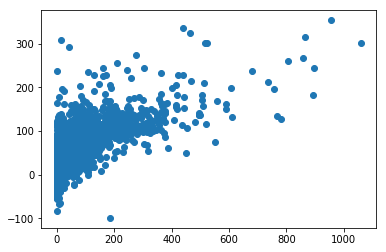

In [165]:
plt.scatter(y_test,pred)

In [166]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.40495337704912271

In [167]:
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.299907e-23
  overwrite_a=True).T


0.47492195004576493

## Support Vector Machines (Regression)

In [100]:
scaler = StandardScaler()
scaler.fit(X_train)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
from sklearn.svm import SVR
params = {'kernel' :'linear'}
svr = SVR(**params)
svr.fit(scaler.transform(X_train), y_train)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
preds = svr.predict(scaler.transform(X_test))
svr.score(scaler.transform(X_test), y_test)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  


0.45637167901002962

## Ensemble Methods

In [101]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
clf.score(X_test, y_test)

0.76989257352532736

MSE: 2428.8544


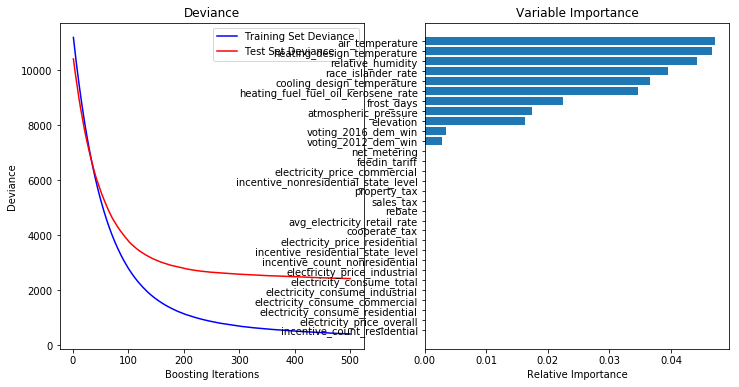

In [103]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[:30], feature_importance[sorted_idx][:30], align='center')
plt.yticks(pos[:30], X_test.columns[sorted_idx][:30])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [168]:
## Random Forests

X_train['target'] = y_train
X_train = X_train.dropna()
y_train = X_train['target']
X_train = X_train.loc[:, ~(X_train.columns).isin(['target', target])]

rfr = ensemble.RandomForestRegressor(max_depth=6, random_state=0, n_estimators=100)
rfr.fit(X_train, y_train)
print(cross_val_score(rfr, X_train, y_train))


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[ 0.63735404  0.65167631  0.68222693]


In [169]:
X_test = X_test.loc[:, ~(X_test.columns).isin(['target', target])]
print(rfr.score(X_test, y_test))

0.664070299232
